In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

#### Import the three datasets


In [2]:
users_df = pd.read_csv(
    'data/users.dat',
    sep='::',
    names=['UserID','Gender','Age', 'Occupation', 'zip-code'],
    engine='python'
)
ratings_df = pd.read_csv(
    'data/ratings.dat',
    sep='::',
    names=['UserID','MovieID','Rating', 'Timestamp'],
    parse_dates=['Timestamp'],
    engine='python'
)
movies_df = pd.read_csv(
    'data/movies.dat',encoding='ISO-8859-1',   # encoding to resolve utf-8 code error
    sep='::',
    names=['MovieID','Title','Genres'],
    engine='python'
)


In [3]:
movies_df.head(2)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy


In [4]:
ratings_df.head(2)

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109


In [5]:
users_df.head(2)

,UserID,Gender,Age,Occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072


#### Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

In [6]:
movie_ratings_df = pd.merge(movies_df, ratings_df, on='MovieID')
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   MovieID    1000209 non-null  int64 
 1   Title      1000209 non-null  object
 2   Genres     1000209 non-null  object
 3   UserID     1000209 non-null  int64 
 4   Rating     1000209 non-null  int64 
 5   Timestamp  1000209 non-null  object
dtypes: int64(3), object(3)
memory usage: 53.4+ MB


In [7]:
movie_ratings_users_df = pd.merge(
    movie_ratings_df,
    users_df,
    on='UserID'
)
movie_ratings_users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   Genres      1000209 non-null  object
 3   UserID      1000209 non-null  int64 
 4   Rating      1000209 non-null  int64 
 5   Timestamp   1000209 non-null  object
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  int64 
 8   Occupation  1000209 non-null  int64 
 9   zip-code    1000209 non-null  object
dtypes: int64(5), object(5)
memory usage: 83.9+ MB


In [8]:
Master_Data = movie_ratings_users_df.drop(
    ['zip-code', 'Timestamp'],
    axis=1
)
Master_Data.head()

,MovieID,Title,Genres,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,F,1,10
2,150,Apollo 13 (1995),Drama,1,5,F,1,10
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,F,1,10
4,527,Schindler's List (1993),Drama|War,1,5,F,1,10


In [9]:
Master_Data.describe(include='all')

,MovieID,Title,Genres,UserID,Rating,Gender,Age,Occupation
count,1.000209e+06,1000209,1000209,1.000209e+06,1.000209e+06,1000209,1.000209e+06,1.000209e+06
unique,NaN,3706,301,NaN,NaN,2,NaN,NaN
top,NaN,American Beauty (1999),Comedy,NaN,NaN,M,NaN,NaN
freq,NaN,3428,116883,NaN,NaN,753769,NaN,NaN
mean,1.865540e+03,NaN,NaN,3.024512e+03,3.581564e+00,NaN,2.973831e+01,8.036138e+00
std,1.096041e+03,NaN,NaN,1.728413e+03,1.117102e+00,NaN,1.175198e+01,6.531336e+00
min,1.000000e+00,NaN,NaN,1.000000e+00,1.000000e+00,NaN,1.000000e+00,0.000000e+00
25%,1.030000e+03,NaN,NaN,1.506000e+03,3.000000e+00,NaN,2.500000e+01,2.000000e+00
50%,1.835000e+03,NaN,NaN,3.070000e+03,4.000000e+00,NaN,2.500000e+01,7.000000e+00
75%,2.770000e+03,NaN,NaN,4.476000e+03,4.000000e+00,NaN,3.500000e+01,1.400000e+01


In [10]:
Master_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   Genres      1000209 non-null  object
 3   UserID      1000209 non-null  int64 
 4   Rating      1000209 non-null  int64 
 5   Gender      1000209 non-null  object
 6   Age         1000209 non-null  int64 
 7   Occupation  1000209 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 68.7+ MB


#### Explore the datasets using visual representations (graphs or tables), also include your comments on the following:

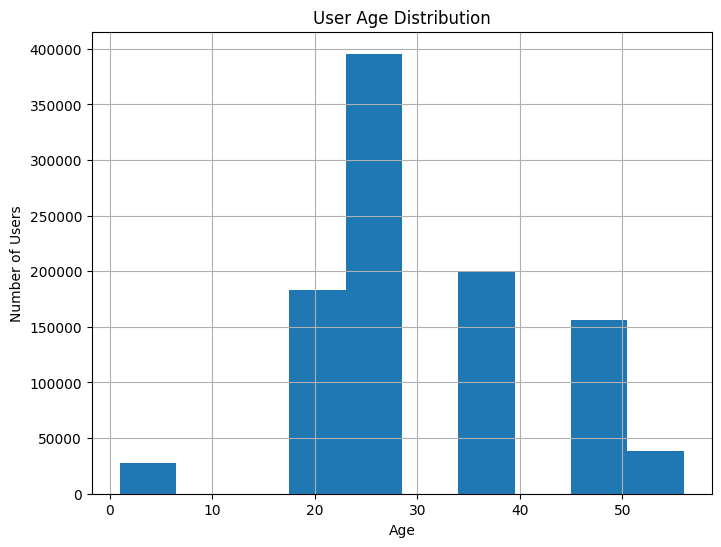

In [11]:
# 1. User Age Distribution
plt.figure(figsize=(8,6))
Master_Data.Age.hist()
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

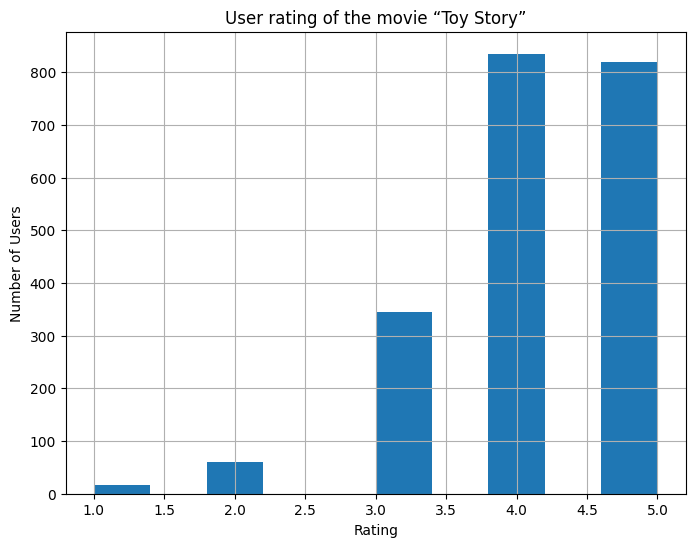

In [12]:
# 2. User rating of the movie “Toy Story”
plt.figure(figsize=(8,6))

user_rating = Master_Data[Master_Data.Title == "Toy Story (1995)"]
user_rating['Rating'].hist()

plt.title('User rating of the movie “Toy Story”')
plt.xlabel('Rating')
plt.ylabel('Number of Users')

plt.show()

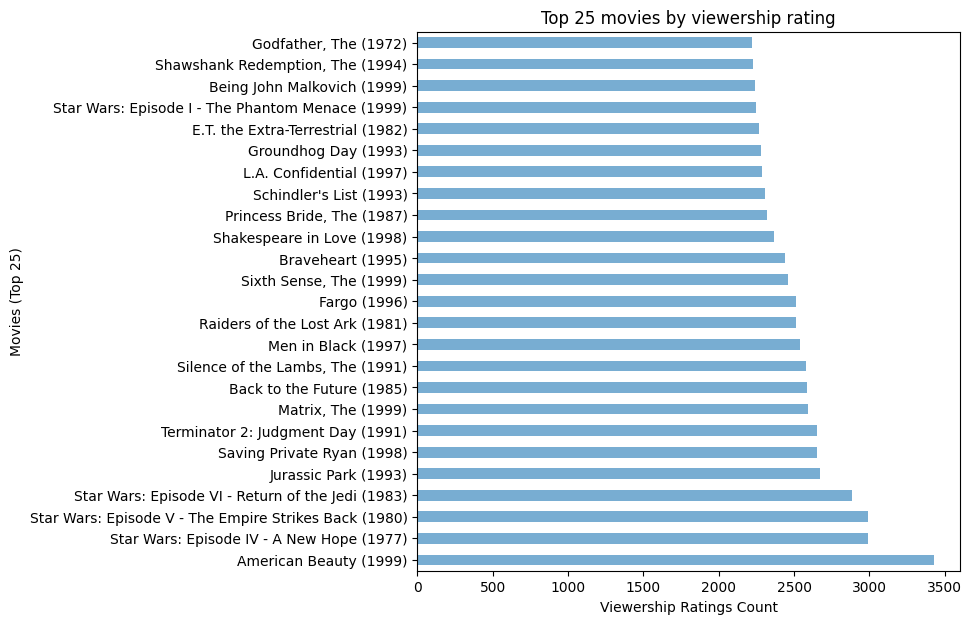

In [13]:
# 3. Top 25 movies by viewership rating

dfTop25 = Master_Data.groupby('Title').size().sort_values(ascending=False)[:25]
dfTop25.plot(kind='barh',alpha=0.6,figsize=(7,7))

plt.xlabel("Viewership Ratings Count")
plt.ylabel("Movies (Top 25)")
plt.title("Top 25 movies by viewership rating")
plt.show()


In [14]:
# 4. Find the ratings for all the movies reviewed by for a particular user of user id = 2696
user_2696 = Master_Data[Master_Data['UserID'] == 2696]
user_2696.head(2)


,MovieID,Title,Genres,UserID,Rating,Gender,Age,Occupation
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,M,25,7
991036,800,Lone Star (1996),Drama|Mystery,2696,5,M,25,7


#### Feature Engineering:
#### Use column genres:





In [15]:
# 1. Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
dfGenres = Master_Data['Genres'].str.split("|")
dfGenres.head(2)

0              [Animation, Children's, Comedy]
1    [Animation, Children's, Musical, Romance]
Name: Genres, dtype: object

In [16]:
listGenres = set()
for genre in dfGenres:
    listGenres = listGenres.union(set(genre))
listGenres

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [17]:
# 2. Create a separate column for each genre category with a one-hot encoding (1 and 0) whether or not the movie belongs to that genre. 
ratingsOneHot = Master_Data['Genres'].str.get_dummies("|")
ratingsOneHot.head(2)

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [18]:
Master_Data = pd.concat([Master_Data,ratingsOneHot],axis=1)
Master_Data.head(2)

,MovieID,Title,Genres,UserID,Rating,Gender,Age,Occupation,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10,0,0,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,F,1,10,0,0,...,0,0,0,1,0,1,0,0,0,0


In [19]:
# 3. Determine the features affecting the ratings of any particular movie.
Master_Data[["Title","Year"]] = Master_Data.Title.str.extract("(.)\s\((.\d+)",expand=True)
Master_Data.head(2)

,MovieID,Title,Genres,UserID,Rating,Gender,Age,Occupation,Action,Adventure,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,1,y,Animation|Children's|Comedy,1,5,F,1,10,0,0,...,0,0,0,0,0,0,0,0,0,1995
1,48,s,Animation|Children's|Musical|Romance,1,5,F,1,10,0,0,...,0,0,1,0,1,0,0,0,0,1995


In [20]:
Master_Data['Year'] = Master_Data.Year.astype(int)
Master_Data['Gender'] = Master_Data.Gender.str.replace('F','1')
Master_Data['Gender'] = Master_Data.Gender.str.replace('M','0')
Master_Data['Gender'] = Master_Data.Gender.astype(int)

In [21]:
dfGenderAffecting = Master_Data.groupby('Gender').size().sort_values(ascending=False)[:25]
dfGenderAffecting

Gender
0    753769
1    246440
dtype: int64

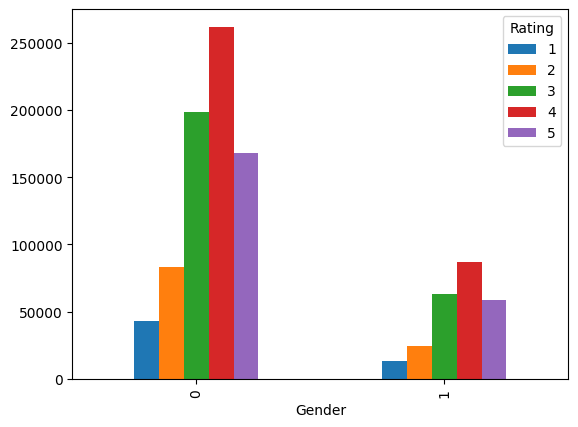

In [22]:
Master_Data.groupby(["Gender","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

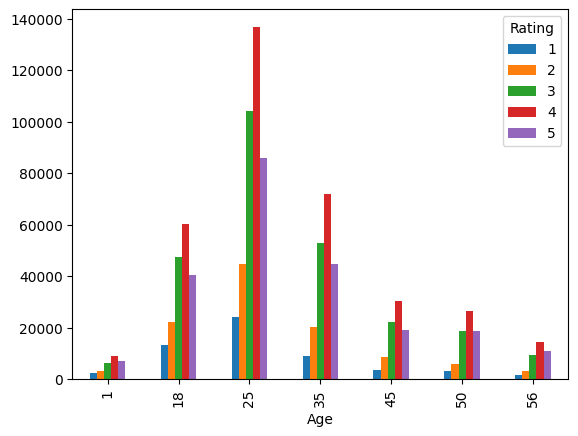

In [23]:
Master_Data.groupby(["Age","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

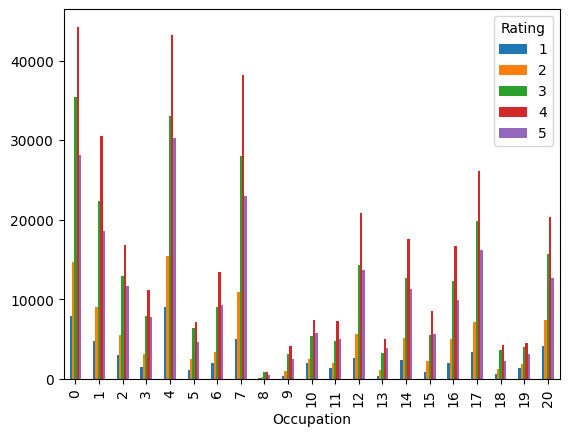

In [24]:
Master_Data.groupby(["Occupation","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

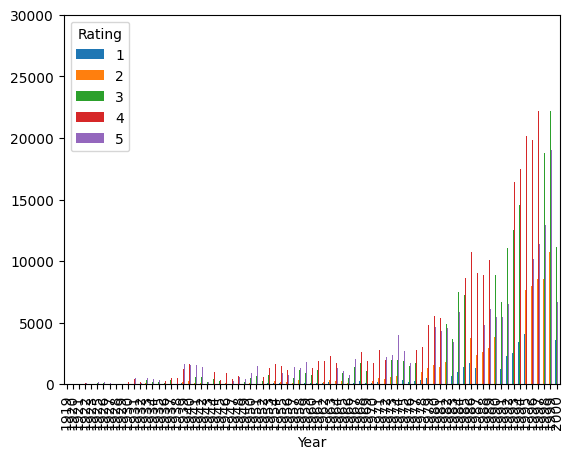

In [25]:
Master_Data.groupby(["Year","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

In [26]:
Master_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 27 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   MovieID      1000209 non-null  int64 
 1   Title        1000209 non-null  object
 2   Genres       1000209 non-null  object
 3   UserID       1000209 non-null  int64 
 4   Rating       1000209 non-null  int64 
 5   Gender       1000209 non-null  int64 
 6   Age          1000209 non-null  int64 
 7   Occupation   1000209 non-null  int64 
 8   Action       1000209 non-null  int64 
 9   Adventure    1000209 non-null  int64 
 10  Animation    1000209 non-null  int64 
 11  Children's   1000209 non-null  int64 
 12  Comedy       1000209 non-null  int64 
 13  Crime        1000209 non-null  int64 
 14  Documentary  1000209 non-null  int64 
 15  Drama        1000209 non-null  int64 
 16  Fantasy      1000209 non-null  int64 
 17  Film-Noir    1000209 non-null  int64 
 18  Horror       1000209 n

In [27]:

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define dataset
X = Master_Data[Master_Data.columns[~Master_Data.columns.isin(['Rating','Title','Genres'])]]
y = Master_Data['Rating']
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
    print('Column: %d %s, Selected=%s, Rank: %d' % (i, X.columns[i], rfe.support_[i], rfe.ranking_[i]))


Column: 0 MovieID, Selected=True, Rank: 1
Column: 1 UserID, Selected=True, Rank: 1
Column: 2 Gender, Selected=True, Rank: 1
Column: 3 Age, Selected=True, Rank: 1
Column: 4 Occupation, Selected=True, Rank: 1
Column: 5 Action, Selected=False, Rank: 6
Column: 6 Adventure, Selected=False, Rank: 8
Column: 7 Animation, Selected=False, Rank: 16
Column: 8 Children's, Selected=False, Rank: 11
Column: 9 Comedy, Selected=False, Rank: 3
Column: 10 Crime, Selected=False, Rank: 10
Column: 11 Documentary, Selected=False, Rank: 20
Column: 12 Drama, Selected=False, Rank: 7
Column: 13 Fantasy, Selected=False, Rank: 17
Column: 14 Film-Noir, Selected=False, Rank: 19
Column: 15 Horror, Selected=False, Rank: 13
Column: 16 Musical, Selected=False, Rank: 14
Column: 17 Mystery, Selected=False, Rank: 15
Column: 18 Romance, Selected=False, Rank: 4
Column: 19 Sci-Fi, Selected=False, Rank: 9
Column: 20 Thriller, Selected=False, Rank: 5
Column: 21 War, Selected=False, Rank: 12
Column: 22 Western, Selected=False, Ra

In [28]:
# 4. Develop an appropriate model to predict the movie ratings
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [29]:
Master_Data_sample = Master_Data.sample(n=50000,random_state=0)

In [30]:
X = Master_Data[['Gender','Age','Occupation']]
y = Master_Data['Rating']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=0
)

In [31]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

In [32]:
print(
    'y-intercept: ',
    linear_reg.intercept_
)
print(
    'Beta coefficients: ',
    linear_reg.coef_
)
print(
    'Mean Abs Error  MAE: ',
    metrics.mean_absolute_error(y_test, y_pred)
)
print(
    'Mean Sq Error  MSE: ',
    metrics.mean_squared_error(y_test, y_pred)
)
print(
    'Root Mean Sq Error RMSE:',
    np.sqrt(metrics.mean_squared_error(y_test, y_pred))
)
print(
    'r2 value: ',
    metrics.r2_score(y_test, y_pred)
)

y-intercept:  3.4027307537406495
Beta coefficients:  [0.05465331 0.00532653 0.00080628]
Mean Abs Error  MAE:  0.9301289599010384
Mean Sq Error  MSE:  1.2412481712244834
Root Mean Sq Error RMSE: 1.1141131770266803
r2 value:  0.00365642292781565


In [33]:
prediction_df = pd.DataFrame({'Test': y_test, 'Prediction': y_pred})
prediction_df.head()

,Test,Prediction
324271,4,3.501833
818637,3,3.556487
148677,5,3.509896
778790,4,3.674701
525489,5,3.537507
